In [1]:
# with this extensin you will find easy to navigate in the document
! pip install jupyter_contrib_nbextensions

# RACIAL DETERMINATION IN NYC SCHOOL ENROLLMENT PROFILE 
## **Advanced Data Science Captsone**
##### Camilo Navarrete, Biochesmitry MS in Biological Sciences, and High School teacher in Chemistry (ch.navarrete.lineros@gmail.com)


# Executive summary

<p style='text-align: justify;'> The USA society racial segregation problem through its history. One of the most diverse ethnic areas in USA is the New York City, in consequence it reflects the result of public policies regarding this issue. After more than half a century of the civil rights movements and the UNESCO implemented policies, we still can talk describe schools based on the race and poverty index. According to the present analysis we can profile schools as: "black schools with high indexes of poverty", "Hispanic schools with high indexes of poverty" and "mixed white-Asian schools with medium indexed of poverty". Despite the discouraging scenario, this could be explained for different causes such as the migratory waves to USA since the 70s. Also, we can argue the Asian and Hispanic differences in the family income and cultural background as a cause of this profiling. Also, the black segregation may reflect consolidated urban areas with an historical background. In conclusion a racial determination in NYC school enrollment does not reflect necessary the failure in the public policies, but it´s more a snapshot of the historical moment.  </p>


**keywords**: *racial segregation*, *public school*, *public policy*

# Preliminars

## Glossary

**Hispanic**: Hispanic or Latino and Not Hispanic or Latino. OMB defines "Hispanic or Latino" as a person of Cuban, Mexican, Puerto Rican, South or Central American, or other Spanish culture or origin regardless of race. 

**Black**:  A person having origins in any of the Black racial groups of Africa.

**White**: A person having origins in any of the original peoples of Europe, the Middle East, or North Africa

**Multi**: having two or more races within your genealogy

## Table of contents

1. Introduction
2. Methosology
3. Results
4. Discussion
5. Conclusion
6. References

# 1. Introduction

<p style='text-align: justify;'> The education as a human activity faces a challenge to keep a balance between the new challenges of the moment and keep the cultural bases such as language, traditions, among others. For this reason, the educational political policies could shape the society. The last century has a plethora of examples including racial segregation, religious rivalries, totalitarian nationalism, etc.

The educational public policies have been strongly determined by the recent history of the last century, the effect of multilateral international agreements and new research works in philosophy and psychology. In consequence, social and political pressure emerges and make people take decisions that have a high economic cost and may affect a complete generation of school graduates. For this reason, is necessary to determinate the scenario, identify the problem in order to evaluate among multiple alternatives.

Among the most challenging problems a society have to face, we can identify the need to give education for a non-homogenous population. The source of this diversity could be religious, ethnic, a political affiliation, etc. What is more complex could be all together at the same time. This situation is quite common in the economic centers, we can find classic examples such as capital of the Roman Empire, the Hellenic Alexandria of Egypt, the Paris of fin-de-siècle or the current New York City for the United States of America. We will focus in the later one as a paradigmatic example for the case.

One of world known characteristic of New York City (NYC) is the ancestry origin diversity. For this reason, the enclaves like the little Italy, the China town, the Jewish neighborhood in Brooklyn, the black Harlem, etc., are portrait in many of the popular culture movies, TV shows, comics and are easily identify as a synonym of NYC. But this arise a question, is there something known as a NYC identity? How the NYC diversity is compatible with general political policies? In order to address these questions, we will make a diagnosis of the current composition in the NYC public schools and then discuss facing the historical data.
 </p>

# 2. Methodology

<p style='text-align: justify;'> To answer the question "what is the composition in the NYC public schools?" we will determinate a period and some features. We will use the school-level student demographic and enrollment data from 2014-15 through 2018-19 provided by the NYC Department of Education. Then the approach will be to find among all the features some of them comparable and identify patterns to get a profile among the different schools.  </p>

**2.1. Exploratory Data Analysis (EDA)**  

**2.2 Machine learning** 

    2.2.1 Dimension Reduction 
    
    2.2.2 Clustering  
    
        i.   K-Means 
       
        ii.  Spectral 
       
        iii. DBSCAN  
        
**2.3 Deep Learning**  

    2.3.1 Model and Training  
   
    2.3.2 Dimension Reduction 
   
    2.3.3 Clustering  
   
        i.   K-Means  
       
        ii.  Spectral  
       
        iii. DBSCAN  


## 2.1. Exploratory Data Analysis (EDA)

### Preliminars about the data
School-level student demographic and enrollment data from 2014-15 through 2018-19
###### Data Provided by NYC Department of Education

https://data.cityofnewyork.us/Education/2018-2019-School-Demographic-Snapshot/45j8-f6umm

In [2]:
# import extensions used in this notebook
!pip install openpyxl
!pip install pandas pandasql
!pip install -U yellowbrick
!pip install tensorflow
!pip uninstall umap
!pip install umap-learn

In [3]:
# import the libraries necessary for the research
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
from pandasql import sqldf
from scipy.stats import f_oneway
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Importing the data from the open NYC database
df = pd.read_excel('https://data.cityofnewyork.us/api/views/45j8-f6um/files/9535cd0d-f16d-4b61-9048-4e97db480b9e?download=true&filename=2018-2019_Demographic_Snapshot_School.xlsx')

In [6]:
# Having a look to the dataframe to have a first approach and some insight of the following steps. 
df.head(1)

DBN                School Name     Year  Total Enrollment  \
0  01M015  P.S. 015 Roberto Clemente  2014-15               183   

   Grade PK (Half Day & Full Day)  Grade K  Grade 1  Grade 2  Grade 3  \
0                              18       27       47       31       19   

   Grade 4  ...  % Multiple Race Categories Not Represented  # White  \
0       17  ...                                    0.005464        2   

    % White  # Students with Disabilities  % Students with Disabilities  \
0  0.010929                            64                      0.349727   

   # English Language Learners  % English Language Learners  # Poverty  \
0                           17                     0.092896        169   

   % Poverty  Economic Need Index  
0   0.923497             0.929921  

[1 rows x 39 columns]

### Identify quality issues

<p style='text-align: justify;'>From this data (df) is possible to have a general idead of the data provided by the NYC database. From a first approach we can infer that "Grades" columns are not present in all the Schools. For this analysis is not a relevant data since we cannot have a comparable data and could be a source of noise.</p>

In [7]:
# I will use the drop method from pandas to discard a dataframe. But we will use it in a copy of the original df.
df2 = df.copy()
df2.drop(['Grade K', 'Grade 1', 'Grade 2', \
          'Grade 3', 'Grade 4', 'Grade 5', \
          'Grade 6', 'Grade 7', 'Grade 8', \
          'Grade 9', 'Grade 10', 'Grade 11', \
          'Grade 12', 'Grade PK (Half Day & Full Day)'], \
           axis=1, inplace=True)
df2.head(1)         

DBN                School Name     Year  Total Enrollment  # Female  \
0  01M015  P.S. 015 Roberto Clemente  2014-15               183        84   

   % Female  # Male    % Male  # Asian   % Asian  ...  \
0  0.459016      99  0.540984        8  0.043716  ...   

   % Multiple Race Categories Not Represented  # White   % White  \
0                                    0.005464        2  0.010929   

   # Students with Disabilities  % Students with Disabilities  \
0                            64                      0.349727   

   # English Language Learners  % English Language Learners  # Poverty  \
0                           17                     0.092896        169   

   % Poverty  Economic Need Index  
0   0.923497             0.929921  

[1 rows x 25 columns]

From this data (df2) now it´s more clear and I decided to only focus in the percentajes since they are already normalized (min 0, max 1)

In [8]:
# Define a simple query to have the percentajes only, since they are normalized it will be easy to compare
query = """
    SELECT 
        "DBN",	"School Name" as "Name",	"Year",	"Total Enrollment" as "Total",
        "% Female" as "%F", "% Male" as "%M", "% Asian", "% Black", "% Hispanic" as "% Hisp", 
        "% Multiple Race Categories Not Represented" as "% Multi", 
        "% White", "% Students with Disabilities" as "% Dis", 
        "% English Language Learners" as "%Elearners", "% Poverty" as "% Pov", 
        "Economic Need Index" as "ENI"
    FROM 
        df2
"""

# Run the query
df_percentajes = sqldf(query, locals())

In [9]:
# Dealing with the Null values using the dropna() method from pandas
df_percentajes = df_percentajes.dropna()

In [10]:
# truncate the data in the 'Year' column. So we can change the string to data
Year = df["Year"].str[:4]
# Replace the string complete "Year" column, with the truncated "Year" column
df_percentajes['Year'] = Year
# change the string to datetime. Other way could have been in the query.
df_percentajes['Year']=pd.to_datetime(df_percentajes['Year']).dt.strftime('%Y')
df_percentajes.head(1)

DBN                       Name  Year  Total        %F        %M  \
0  01M015  P.S. 015 Roberto Clemente  2014    183  0.459016  0.540984   

    % Asian   % Black    % Hisp   % Multi   % White     % Dis  %Elearners  \
0  0.043716  0.355191  0.584699  0.005464  0.010929  0.349727    0.092896   

      % Pov       ENI  
0  0.923497  0.929921

In [11]:
# first insight
df_percentajes.describe()

Total           %F           %M      % Asian      % Black  \
count  8973.000000  8973.000000  8973.000000  8973.000000  8973.000000   
mean    598.851889     0.483066     0.516921     0.112403     0.321500   
std     482.631286     0.095835     0.095835     0.165170     0.270796   
min      12.000000     0.000000     0.000000     0.000000     0.000000   
25%     326.000000     0.462572     0.486874     0.012723     0.085670   
50%     483.000000     0.488189     0.511811     0.039130     0.255869   
75%     703.000000     0.513120     0.537415     0.136768     0.510903   
max    5937.000000     1.000000     1.000000     0.946914     0.987179   

            % Hisp      % Multi      % White        % Dis   %Elearners  \
count  8973.000000  8973.000000  8973.000000  8973.000000  8973.000000   
mean      0.421989     0.023076     0.121031     0.225278     0.134961   
std       0.251362     0.025963     0.181851     0.159376     0.141107   
min       0.005900     0.000000     0.000000     0.000000     0.000000   
25%       0.195565     0.007707     0.013187     0.153179     0.041841   
50%       0.394595     0.015521     0.031556     0.198614     0.093817   
75%       0.630542     0.028129     0.144618     0.250000     0.179104   
max       1.000000     0.374481     0.932773     1.000000     1.000000   

             % Pov          ENI  
count  8973.000000  8973.000000  
mean      0.753394     0.691430  
std       0.196845     0.204106  
min       0.029126     0.029611  
25%       0.680000     0.579029  
50%       0.804918     0.743248  
75%       0.894552     0.846122  
max       1.000000     0.998051

From the first insight I can see:
- Some schools are very small, the min is 12 students and the max is almos 6000
- The schools are not heterogenously race distribuited, even so, some of them are almost one ethnic group
- Some schools are unisex
- Some school are exclusive for students with dasbilities or English language learners
- All the data is through 5 years per school, there could be changes that influence the analysis

Some basic questions to guide the EDA
- Is there some correlation between the factors?
- Is there a consistent change per school through the time?

### Particular cases in the profile enrrolment

<p style='text-align: justify;'>Before to make any analysis, it´s relevant to understand the bussiness variables. Here the variable dissabilitie make a reference to students with some handicap, this could make noise since some question could arise such as: are the rich families sending their kids to the public educational system? And if it so, is there an ethnic bias?</p>



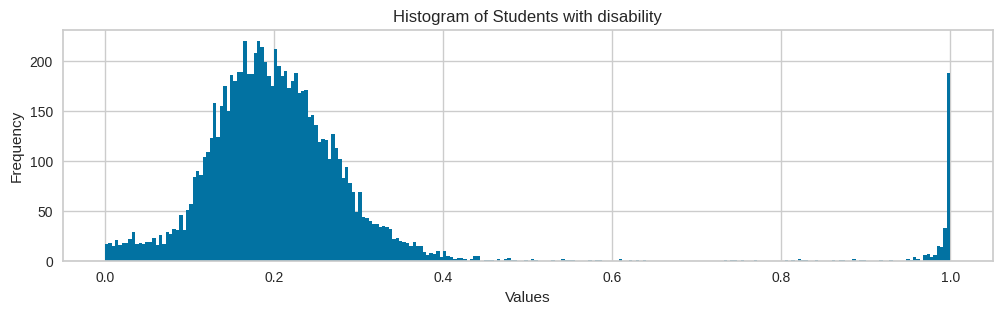

In [12]:
# An histogram approach to see if there is some difference between the % students with dissabilities making noise
# Plot a histogram of a single column in the DataFrame
plt.rcParams["figure.figsize"] = (12,3)
df_percentajes.hist(column='% Dis',bins =250)

# Set the title and axis labels
plt.title('Histogram of Students with disability')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

**From the previous histogram it´s possible to see there are 2 populations: from 0-0.5 students with dissabilities  and above 0.5**

I will select only the first population since it has a normal distribution.

Other question thay may arise is if there is a high index of English language learners, can this imply kids from migrant families? This will make a strong bias to some ethnic group such as latinos and asians. 

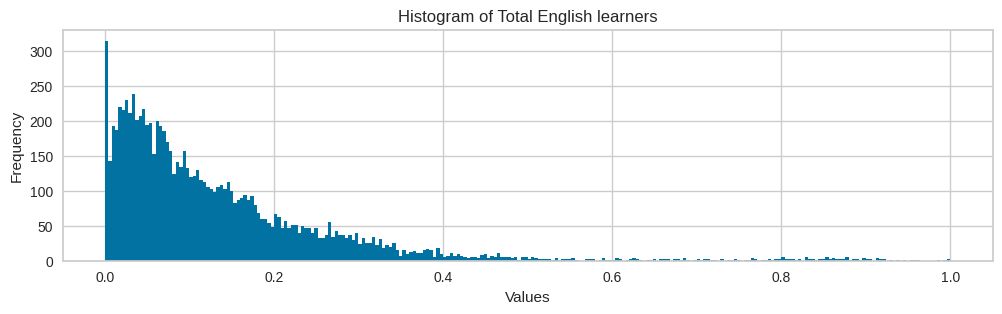

In [13]:
# An histogram approach to see if there is some difference between the % English language learning students making noise
# Plot a histogram of a single column in the DataFrame
plt.rcParams["figure.figsize"] = (12,3)
df_percentajes.hist(column='%Elearners', bins =250)

# Set the title and axis labels
plt.title('Histogram of Total English learners')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

**From the previous histogram it´s possible to see there are 2 populations: from 0-0.4 students and above 0.4.**

This point is relevant since it could be noisy for the analysis. A high value of %English language learners could mean a first generation of migrants and make an imbalance in the racial % and change the school economic indexes. I will decide for a 1/3 of English language learners as a cut off

### Change in the variables through the time

Now I make a short analysis to know If this feature vary throught the time. Maybe one there was a massive increment in some enrollment of students with some feature and could be a source of noise in the dimension reduction giving a problem at the momento to implemet the clustering algorithms

In [14]:
#This function is to get a query for all the data per year in a different file
def query_df_percentajes_by_year(year):
    query = f'SELECT "DBN", "Name",	"Year", "Total", "%F", "% Asian", "% Black", "% Hisp", "% Multi", "% White", "% Dis", "%Elearners", "% Pov", "ENI" FROM df_percentajes WHERE "Year" = {year}'
    return query

df_2014 = sqldf(query_df_percentajes_by_year(2014), locals())
df_2015 = sqldf(query_df_percentajes_by_year(2015), locals())
df_2016 = sqldf(query_df_percentajes_by_year(2016), locals())
df_2017 = sqldf(query_df_percentajes_by_year(2017), locals())
df_2018 = sqldf(query_df_percentajes_by_year(2018), locals())

**Then I check if the data is comparable between the years**

A change may indicate some phenomena such as a mass migration, or the implementation of public politics. 

In [15]:
# Make the queries to compare the data TOTAL
query1 = '''SELECT "Total" as "Total_2014" FROM df_2014'''
df_total_2014 = sqldf(query1, locals())
df_total_2014 = pd.DataFrame(df_total_2014)

query2 = '''SELECT "Total" as "Total_2015" FROM df_2015'''
df_total_2015 = sqldf(query2, locals())
df_total_2015 = pd.DataFrame(df_total_2015)

query3 = '''SELECT "Total" as "Total_2016" FROM df_2016'''
df_total_2016 = sqldf(query3, locals())
df_total_2016 = pd.DataFrame(df_total_2016)

query4 = '''SELECT "Total" as "Total_2017" FROM df_2017'''
df_total_2017 = sqldf(query4, locals())
df_total_2017 = pd.DataFrame(df_total_2017)

query5 = '''SELECT "Total" as "Total_2018" FROM df_2018'''
df_total_2018 = sqldf(query5, locals())
df_total_2018 = pd.DataFrame(df_total_2018)


df_total = pd.concat([df_total_2014, df_total_2015, df_total_2016, df_total_2017, df_total_2018], axis=1).reindex(df_total_2014.index)

In [16]:
test_statistic, p_value = f_oneway(df_total_2014, df_total_2015, df_total_2016, df_total_2017, df_total_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [0.41310068] , p-value =  [0.79933867]


In [17]:
# Make the queries to compare the data F
query1 = '''SELECT "%F" as "F_2014" FROM df_2014'''
df_F_2014 = sqldf(query1, locals())
df_F_2014 = pd.DataFrame(df_F_2014)

query2 = '''SELECT "%F" as "F_2015" FROM df_2015'''
df_F_2015 = sqldf(query2, locals())
df_F_2015 = pd.DataFrame(df_F_2015)

query3 = '''SELECT "%F" as "F_2016" FROM df_2016'''
df_F_2016 = sqldf(query3, locals())
df_F_2016 = pd.DataFrame(df_F_2016)

query4 = '''SELECT "%F" as "F_2017" FROM df_2017'''
df_F_2017 = sqldf(query4, locals())
df_F_2017 = pd.DataFrame(df_F_2017)

query5 = '''SELECT "%F" as "F_2018" FROM df_2018'''
df_F_2018 = sqldf(query5, locals())
df_F_2018 = pd.DataFrame(df_F_2018)


df_F = pd.concat([df_F_2014, df_F_2015, df_F_2016, df_F_2017, df_F_2018], axis=1).reindex(df_F_2014.index)

In [18]:
test_statistic, p_value = f_oneway(df_F_2014, df_F_2015, df_F_2016, df_F_2017, df_F_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [0.05282095] , p-value =  [0.99479675]


In [19]:
# Make the queries to compare the data Asian
query1 = '''SELECT "% Asian" as "Asian_2014" FROM df_2014'''
df_asian_2014 = sqldf(query1, locals())
df_asian_2014 = pd.DataFrame(df_asian_2014)

query2 = '''SELECT "% Asian" as "Asian_2015" FROM df_2015'''
df_asian_2015 = sqldf(query2, locals())
df_asian_2015 = pd.DataFrame(df_asian_2015)

query3 = '''SELECT "% Asian" as "Asian_2016" FROM df_2016'''
df_asian_2016 = sqldf(query3, locals())
df_asian_2016 = pd.DataFrame(df_asian_2016)

query4 = '''SELECT "% Asian" as "Asian_2017" FROM df_2017'''
df_asian_2017 = sqldf(query4, locals())
df_asian_2017 = pd.DataFrame(df_asian_2017)

query5 = '''SELECT "% Asian" as "Asian_2018" FROM df_2018'''
df_asian_2018 = sqldf(query5, locals())
df_asian_2018 = pd.DataFrame(df_asian_2018)


df_asian = pd.concat([df_asian_2014, df_asian_2015, df_asian_2016, df_asian_2017, df_asian_2018], axis=1).reindex(df_asian_2014.index)

In [20]:
test_statistic, p_value = f_oneway(df_asian_2014, df_asian_2015, df_asian_2016, df_asian_2017, df_asian_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [0.29289374] , p-value =  [0.88274725]


In [21]:
# Make the queries to compare the data %Black
query1 = '''SELECT "% Black" as "Black_2014" FROM df_2014'''
df_black_2014 = sqldf(query1, locals())
df_black_2014 = pd.DataFrame(df_black_2014)

query2 = '''SELECT "% Black" as "Black_2015" FROM df_2015'''
df_black_2015 = sqldf(query2, locals())
df_black_2015 = pd.DataFrame(df_black_2015)

query3 = '''SELECT "% Black" as "Black_2016" FROM df_2016'''
df_black_2016 = sqldf(query3, locals())
df_black_2016 = pd.DataFrame(df_black_2016)

query4 = '''SELECT "% Black" as "Black_2017" FROM df_2017'''
df_black_2017 = sqldf(query4, locals())
df_black_2017 = pd.DataFrame(df_black_2017)

query5 = '''SELECT "% Black" as "Black_2018" FROM df_2018'''
df_black_2018 = sqldf(query5, locals())
df_black_2018 = pd.DataFrame(df_black_2018)


df_black = pd.concat([df_black_2014, df_black_2015, df_black_2016, df_black_2017, df_black_2018], axis=1).reindex(df_black_2014.index)

In [22]:
test_statistic, p_value = f_oneway(df_black_2014, df_black_2015, df_black_2016, df_black_2017, df_black_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [2.00451722] , p-value =  [0.09101642]


In [23]:
# Make the queries to compare the data %Hisp
query1 = '''SELECT "% Hisp" as "Hisp_2014" FROM df_2014'''
df_hisp_2014 = sqldf(query1, locals())
df_hisp_2014 = pd.DataFrame(df_hisp_2014)

query2 = '''SELECT "% Hisp" as "Hisp_2015" FROM df_2015'''
df_hisp_2015 = sqldf(query2, locals())
df_hisp_2015 = pd.DataFrame(df_hisp_2015)

query3 = '''SELECT "% Hisp" as "Hisp_2016" FROM df_2016'''
df_hisp_2016 = sqldf(query3, locals())
df_hisp_2016 = pd.DataFrame(df_hisp_2016)

query4 = '''SELECT "% Hisp" as "Hisp_2017" FROM df_2017'''
df_hisp_2017 = sqldf(query4, locals())
df_hisp_2017 = pd.DataFrame(df_hisp_2017)

query5 = '''SELECT "% Hisp" as "Hisp2018" FROM df_2018'''
df_hisp_2018 = sqldf(query5, locals())
df_hisp_2018 = pd.DataFrame(df_hisp_2018)


df_hisp = pd.concat([df_hisp_2014, df_hisp_2015, df_hisp_2016, df_hisp_2017, df_hisp_2018], axis=1).reindex(df_hisp_2014.index)

In [24]:
test_statistic, p_value = f_oneway(df_hisp_2014, df_hisp_2015, df_hisp_2016, df_hisp_2017, df_hisp_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [0.44035683] , p-value =  [0.77952709]


In [25]:
# Make the queries to compare the data %Multi
query1 = '''SELECT "% Multi" as "Multi_2014" FROM df_2014'''
df_multi_2014 = sqldf(query1, locals())
df_multi_2014 = pd.DataFrame(df_multi_2014)

query2 = '''SELECT "% Multi" as "Multi_2015" FROM df_2015'''
df_multi_2015 = sqldf(query2, locals())
df_multi_2015 = pd.DataFrame(df_multi_2015)

query3 = '''SELECT "% Multi" as "Multi_2016" FROM df_2016'''
df_multi_2016 = sqldf(query3, locals())
df_multi_2016 = pd.DataFrame(df_multi_2016)

query4 = '''SELECT "% Multi" as "Multi_2017" FROM df_2017'''
df_multi_2017 = sqldf(query4, locals())
df_multi_2017 = pd.DataFrame(df_multi_2017)

query5 = '''SELECT "% Multi" as "Multi_2018" FROM df_2018'''
df_multi_2018 = sqldf(query5, locals())
df_multi_2018 = pd.DataFrame(df_multi_2018)


df_multi = pd.concat([df_multi_2014, df_multi_2015, df_multi_2016, df_multi_2017, df_multi_2018], axis=1).reindex(df_hisp_2014.index)

In [26]:
test_statistic, p_value = f_oneway(df_multi_2014, df_multi_2015, df_multi_2016, df_multi_2017, df_multi_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [25.77182108] , p-value =  [2.87218993e-21]


In [27]:
round(df_multi.describe(),3)

Multi_2014  Multi_2015  Multi_2016  Multi_2017  Multi_2018
count    1743.000    1743.000    1743.000    1743.000    1743.000
mean        0.019       0.021       0.024       0.025       0.027
std         0.023       0.024       0.027       0.028       0.028
min         0.000       0.000       0.000       0.000       0.000
25%         0.006       0.007       0.008       0.009       0.010
50%         0.012       0.014       0.016       0.017       0.019
75%         0.023       0.026       0.029       0.031       0.033
max         0.252       0.222       0.297       0.310       0.374

**According to this analysis we cannot asume the different groups are equivalent. But, the vague therm "Multi ethnic" or "Multi racial". The US goverment make this less clear with the definition "two or more racial origin". According to this all the people from the Hispanic countries are also Multi ethnic. Other example could be the Jewish students, since in the late century many waves of migrants came from abroad should we consider the jewish identity as a racial group or as a country of origin? Due the little percentaje, I will ignore this variable.**

In [28]:
# Make the queries to compare the data %White
query1 = '''SELECT "% White" as "White_2014" FROM df_2014'''
df_white_2014 = sqldf(query1, locals())
df_white_2014 = pd.DataFrame(df_white_2014)

query2 = '''SELECT "% White" as "White_2015" FROM df_2015'''
df_white_2015 = sqldf(query2, locals())
df_white_2015 = pd.DataFrame(df_white_2015)

query3 = '''SELECT "% White" as "White_2016" FROM df_2016'''
df_white_2016 = sqldf(query3, locals())
df_white_2016 = pd.DataFrame(df_white_2016)

query4 = '''SELECT "% White" as "White_2017" FROM df_2017'''
df_white_2017 = sqldf(query4, locals())
df_white_2017 = pd.DataFrame(df_white_2017)

query5 = '''SELECT "% White" as "White_2018" FROM df_2018'''
df_white_2018 = sqldf(query5, locals())
df_white_2018 = pd.DataFrame(df_white_2018)


df_white = pd.concat([df_white_2014, df_white_2015, df_white_2016, df_white_2017, df_white_2018], axis=1).reindex(df_white_2014.index)

In [29]:
test_statistic, p_value = f_oneway(df_white_2014, df_white_2015, df_white_2016, df_white_2017, df_white_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [0.05038169] , p-value =  [0.99525093]


In [30]:
# Make the queries to compare the data %Dis
query1 = '''SELECT "% Dis" as "Dis_2014" FROM df_2014'''
df_dis_2014 = sqldf(query1, locals())
df_dis_2014 = pd.DataFrame(df_dis_2014)

query2 = '''SELECT "% Dis" as "Dis_2015" FROM df_2015'''
df_dis_2015 = sqldf(query2, locals())
df_dis_2015 = pd.DataFrame(df_dis_2015)

query3 = '''SELECT "% Dis" as "Dis_2016" FROM df_2016'''
df_dis_2016 = sqldf(query3, locals())
df_dis_2016 = pd.DataFrame(df_dis_2016)

query4 = '''SELECT "% Dis" as "Dis_2017" FROM df_2017'''
df_dis_2017 = sqldf(query4, locals())
df_dis_2017 = pd.DataFrame(df_dis_2017)

query5 = '''SELECT "% Dis" as "Dis_2018" FROM df_2018'''
df_dis_2018 = sqldf(query5, locals())
df_dis_2018 = pd.DataFrame(df_dis_2018)


df_dis = pd.concat([df_dis_2014, df_dis_2015, df_dis_2016, df_dis_2017, df_dis_2018], axis=1).reindex(df_dis_2014.index)

In [31]:
test_statistic, p_value = f_oneway(df_dis_2014, df_dis_2015, df_dis_2016, df_dis_2017, df_dis_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [2.76648327] , p-value =  [0.02589413]


In [32]:
round(df_dis.describe(),3)

Dis_2014  Dis_2015  Dis_2016  Dis_2017  Dis_2018
count  1743.000  1743.000  1743.000  1743.000  1743.000
mean      0.216     0.223     0.229     0.234     0.233
std       0.160     0.161     0.160     0.160     0.161
min       0.000     0.000     0.000     0.000     0.000
25%       0.146     0.151     0.157     0.161     0.160
50%       0.188     0.197     0.202     0.207     0.204
75%       0.240     0.248     0.253     0.259     0.256
max       1.000     1.000     1.000     1.000     1.000

**According to this analysis we cannot asume the different groups are equivalent, so we can use it as a big group. But, the feature "Dissability" it´s not related with the ethnicity or economic level per se. Also we can see with the .describe() method that the values are quite similar. Due this I will ignore this as a variable to find in the correlation.**

In [33]:
# Make the queries to compare the data %Elearners
query1 = '''SELECT "%Elearners" as "ELL_2014" FROM df_2014'''
df_ell_2014 = sqldf(query1, locals())
df_ell_2014 = pd.DataFrame(df_ell_2014)

query2 = '''SELECT "%Elearners" as "ELL_2015" FROM df_2015'''
df_ell_2015 = sqldf(query2, locals())
df_ell_2015 = pd.DataFrame(df_ell_2015)

query3 = '''SELECT "%Elearners" as "ELL_2016" FROM df_2016'''
df_ell_2016 = sqldf(query3, locals())
df_ell_2016 = pd.DataFrame(df_ell_2016)

query4 = '''SELECT "%Elearners" as "ELL_2017" FROM df_2017'''
df_ell_2017 = sqldf(query4, locals())
df_ell_2017 = pd.DataFrame(df_ell_2017)

query5 = '''SELECT "%Elearners" as "ELL_2018" FROM df_2018'''
df_ell_2018 = sqldf(query5, locals())
df_ell_2018 = pd.DataFrame(df_ell_2018)


df_ell = pd.concat([df_ell_2014, df_ell_2015, df_ell_2016, df_ell_2017, df_ell_2018], axis=1).reindex(df_ell_2014.index)

In [34]:
test_statistic, p_value = f_oneway(df_ell_2014, df_ell_2015, df_ell_2016, df_ell_2017, df_ell_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [1.8197038] , p-value =  [0.12196988]


In [35]:
# Make the queries to compare the data % Pov
query1 = '''SELECT "% Pov" as "POV_2014" FROM df_2014'''
df_pov_2014 = sqldf(query1, locals())
df_pov_2014 = pd.DataFrame(df_pov_2014)

query2 = '''SELECT "% Pov" as "POV_2015" FROM df_2015'''
df_pov_2015 = sqldf(query2, locals())
df_pov_2015 = pd.DataFrame(df_pov_2015)

query3 = '''SELECT "% Pov" as "POV_2016" FROM df_2016'''
df_pov_2016 = sqldf(query3, locals())
df_pov_2016 = pd.DataFrame(df_pov_2016)

query4 = '''SELECT "% Pov" as "POV_2017" FROM df_2017'''
df_pov_2017 = sqldf(query4, locals())
df_pov_2017 = pd.DataFrame(df_pov_2017)

query5 = '''SELECT "% Pov" as "POV_2018" FROM df_2018'''
df_pov_2018 = sqldf(query5, locals())
df_pov_2018 = pd.DataFrame(df_pov_2018)


df_pov = pd.concat([df_pov_2014, df_pov_2015, df_pov_2016, df_pov_2017, df_pov_2018], axis=1).reindex(df_pov_2014.index)

In [36]:
test_statistic, p_value = f_oneway(df_pov_2014, df_pov_2015, df_pov_2016, df_pov_2017, df_pov_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [18.27099505] , p-value =  [5.82664243e-15]


In [37]:
round(df_pov.describe(),3)

POV_2014  POV_2015  POV_2016  POV_2017  POV_2018
count  1743.000  1743.000  1743.000  1743.000  1743.000
mean      0.749     0.736     0.732     0.780     0.758
std       0.194     0.199     0.206     0.195     0.195
min       0.038     0.033     0.029     0.056     0.060
25%       0.672     0.646     0.630     0.729     0.697
50%       0.794     0.781     0.781     0.838     0.812
75%       0.888     0.881     0.885     0.915     0.894
max       1.000     1.000     1.000     1.000     1.000

**According to this analysis we cannot asume the different groups are equivalent, so we can use it as a big group. But, the feature the .describe() method shows the mean values are quite similar. Due this I will ignore this as a variable and still keep the full set of years.**

In [38]:
# Make the queries to compare the data % ENI
query1 = '''SELECT "ENI" as "ENI_2014" FROM df_2014'''
df_eni_2014 = sqldf(query1, locals())
df_eni_2014 = pd.DataFrame(df_eni_2014)

query2 = '''SELECT "ENI" as "ENI_2015" FROM df_2015'''
df_eni_2015 = sqldf(query2, locals())
df_eni_2015 = pd.DataFrame(df_eni_2015)

query3 = '''SELECT "ENI" as "ENI_2016" FROM df_2016'''
df_eni_2016 = sqldf(query3, locals())
df_eni_2016 = pd.DataFrame(df_eni_2016)

query4 = '''SELECT "ENI" as "ENI_2017" FROM df_2017'''
df_eni_2017 = sqldf(query4, locals())
df_eni_2017 = pd.DataFrame(df_eni_2017)

query5 = '''SELECT "ENI" as "ENI_2018" FROM df_2018'''
df_eni_2018 = sqldf(query5, locals())
df_eni_2018 = pd.DataFrame(df_eni_2018)


df_eni = pd.concat([df_eni_2014, df_eni_2015, df_eni_2016, df_eni_2017, df_pov_2018], axis=1).reindex(df_pov_2014.index)

In [39]:
test_statistic, p_value = f_oneway(df_eni_2014, df_eni_2015, df_eni_2016, df_eni_2017, df_eni_2018)
print("tstat = ", test_statistic, ", p-value = ", p_value)

tstat =  [103.11545245] , p-value =  [5.37885486e-86]


In [40]:
round(df_eni.describe(), 3)

ENI_2014  ENI_2015  ENI_2016  ENI_2017  POV_2018
count  1743.000  1743.000  1743.000  1743.000  1743.000
mean      0.668     0.654     0.644     0.747     0.758
std       0.196     0.201     0.205     0.201     0.195
min       0.049     0.034     0.030     0.059     0.060
25%       0.558     0.537     0.523     0.663     0.697
50%       0.718     0.705     0.688     0.808     0.812
75%       0.817     0.809     0.800     0.896     0.894
max       0.990     0.982     0.982     0.996     1.000

**Again, according to this analysis we cannot asume the different groups are equivalent. But, the feature the .describe() method shows the mean values are quite similar. Due this I will ignore this as a variable and still keep the full set of years.**

### Correlation matrix

First I will resume the data by school in a new dataframe using a new sql query from the df_percentajes dataframe

In [41]:
# Define matrix to correlation
query = """
    SELECT 
        "% Asian", "% Black", "% Hisp", 
        "% White", "% Dis","%Elearners", "% Pov", "ENI"
    FROM 
        df_percentajes
    WHERE "% Dis" < 0.5 AND "Total"
"""

# Run the query
df_corr = sqldf(query, locals())

In [42]:
df_clean = df_corr.dropna()

In [43]:
# I will implement a correlation matrix to check at a blood eye level 
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df_clean, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

This nice code was obtained from https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another

**After a first look to the correlation information, I will select only the data with some correlation discarding the population of "% Dis" and "%ELearners" according to the criteria explained before from the histograms**

In [44]:
# Define matrix to correlation for the clustering but now with the selected data from what I infer of the particular cases in the profile enrollment
query = """
    SELECT 
        "% Asian", "% Black", "% Hisp", "% White","%Elearners", "% Pov", "ENI"
    FROM 
        df_clean
    WHERE 
    "% Dis" < 0.5 AND "%Elearners" < 0.33

"""
# "% Black" > 0.05 AND "% Hisp" > 0.05 AND "% White" > 0.05 AND "% Black" < 0.95 AND "% Hisp" < 0.95 AND "% White" < 0.95 AND 
# Run the query
df_corr2 = sqldf(query, locals())

In [45]:
df_corr2.isnull().values.any()

False

In [47]:
# I will implement a new correlation matrix to have a more clear insight 
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df_corr2, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)

<p style='text-align: justify;'> From this first approach the df_corr2 offers a good profile to make a cluster analysis</p>












## 2.2 Machine Learning

<p style='text-align: justify;'> Unsupervised learning, also known as unsupervised machine learning, uses machine learning algorithms to analyze and cluster unlabeled datasets. These algorithms discover hidden patterns or data groupings without the need for human intervention. </p>

### 2.2.1 Dimension Reduction

<p style='text-align: justify;'> The features in de file corr_2 may have some correlation, but it´s difficult to appreaciate a blood eyes sight, even more the problem arise if we want to make a correlation of the correlations. For this reason a good approach y the Dimension Reducion and the, apply the clustering algorithm. </p>

<p style='text-align: justify;'> Principal component analysis (PCA) is a powerful mathematical technique to reduce the complexity of data. It detects linear combinations of the input fields that can best capture the variance in the entire set of fields, where the components are orthogonal to and not correlated with each other. </p>

Text(0, 0.5, 'Cumulative Explained Variance')

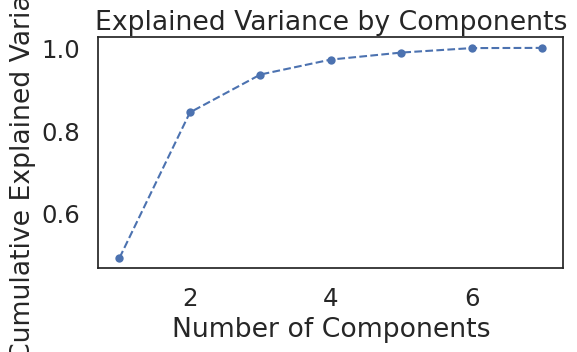

In [705]:
# PCA
pca = PCA()
pca.fit(df_corr2)
pca.explained_variance_ratio_
plt.figure(figsize = (6,3))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [67]:
# Reducing the dimensions with a seelected from the previus graph PCA, in this case 3 because it´s almost the 100%
pca = PCA()
pca.fit(df_corr2)
PCA_model = PCA(n_components=3) # defines previously from the graph analysis
PCA_transformed_data = PCA_model.fit_transform(df_corr2)

<p style='text-align: justify;'> t-SNE (T-distributed Stochastic Neighbor Embedding) is a machine learning algorithm for data visualization. t-SNE graphs model each high-dimensional object by a 2- or 3-dimensional point such that similar objects are modeled by nearby points and dissimilar objects are modeled by distant points with high probability. Using the previously reduced data from the PCA we will fit it into the t-SNE to obtain data to the clustering algorithms</p>

Text(0, 0.5, 'KL divergence')

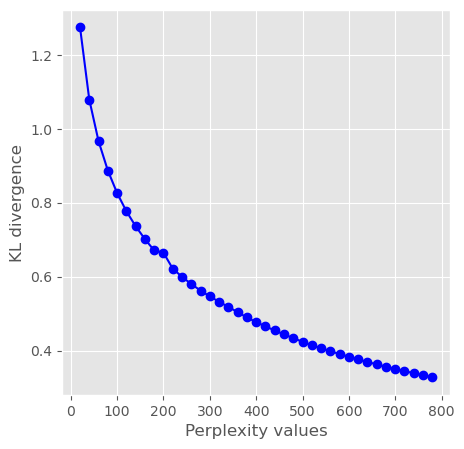

In [25]:
# Searching for a perplexity number
perplexity_vals = np.arange(20, 800, 20)
KL_divergences = []

for i in perplexity_vals:
  TSNE_model = TSNE(n_components=2, perplexity=i, n_iter=500, random_state=0).fit(PCA_transformed_data)
  KL_divergences.append(TSNE_model.kl_divergence_)

plt.style.use("ggplot") 
plt.figure(figsize=[5, 5])
plt.plot(perplexity_vals, KL_divergences, marker='o', color='blue')
plt.xlabel("Perplexity values")
plt.ylabel("KL divergence")

<p style='text-align: justify;'> **This code is extremely time demanding, I suggest to obtain a first result and then go for the detailed area** </p>

Text(0, 0.5, 'KL divergence')

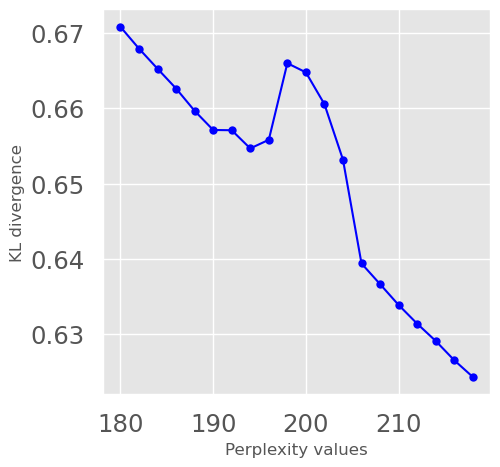

In [233]:
# Searching for a perplexity number in a narrow size to select a more accurate value
perplexity_vals = np.arange(180, 220, 2)
KL_divergences = []

for i in perplexity_vals:
  TSNE_model = TSNE(n_components=2, perplexity=i, n_iter=500, random_state=0).fit(PCA_transformed_data)
  KL_divergences.append(TSNE_model.kl_divergence_)

plt.style.use("ggplot") 
plt.figure(figsize=[5, 5])
plt.plot(perplexity_vals, KL_divergences, marker='o', color='blue')
plt.xlabel("Perplexity values")
plt.ylabel("KL divergence")

**Now we can determine 198 as the perplexity value for the tSNE**

In [70]:
# Reducing the dimensions with a seelected perplexity value over the previous PCA transformed data
TSNE_model = TSNE(n_components=2, perplexity=198.0, learning_rate='auto', n_iter=10000, random_state=42)
PCA_TSNE_transformed_data = TSNE_model.fit_transform(PCA_transformed_data)
PCA_TSNE_transformed_data =pd.DataFrame(PCA_TSNE_transformed_data)

In [71]:
df_A = PCA_TSNE_transformed_data.copy()

In [72]:
df_A.rename(columns = {0:'Dim 1', 1:'Dim 2'}, inplace = True)
df_A.head(1)

Dim 1     Dim 2
0 -24.395292 -9.512433

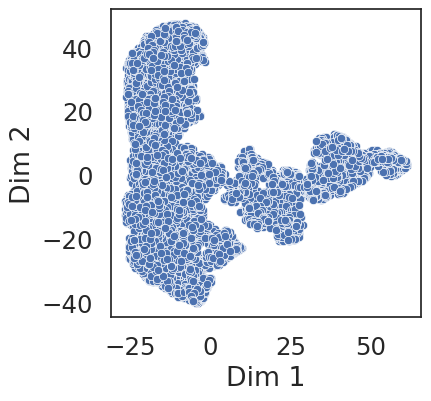

In [73]:
plt.figure(figsize=(4,4))
ax = sns.scatterplot(x="Dim 1", y="Dim 2", data = df_A)
plt.show()

**From this plot we can have an idea of at least 4 groups, nevertheless we need statistical support for out decision.**

### 2.2.2 Clustering

<p style='text-align: justify;'> Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). This approach could clarify what is the grouping scenario in the public schoolsand then we can make an analysis regarding the demographic characteristics of NYC</p>

#### i. K-Means

<p style='text-align: justify;'> k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.</p>

<p style='text-align: justify;'> Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.</p>

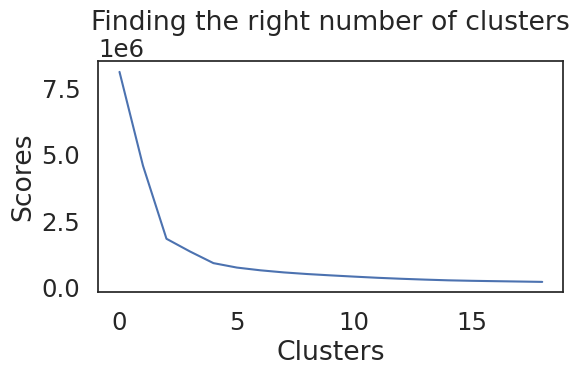

In [74]:
# We will obtain a inertia score with the data previously the Deep Learning and then we will compare the same approach after
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init=10)
  kmeans.fit(df_A)
  scores_1.append(kmeans.inertia_) 
plt.figure(figsize = (6,3))
plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores') 
plt.show()

<p style='text-align: justify;'> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation)</p>

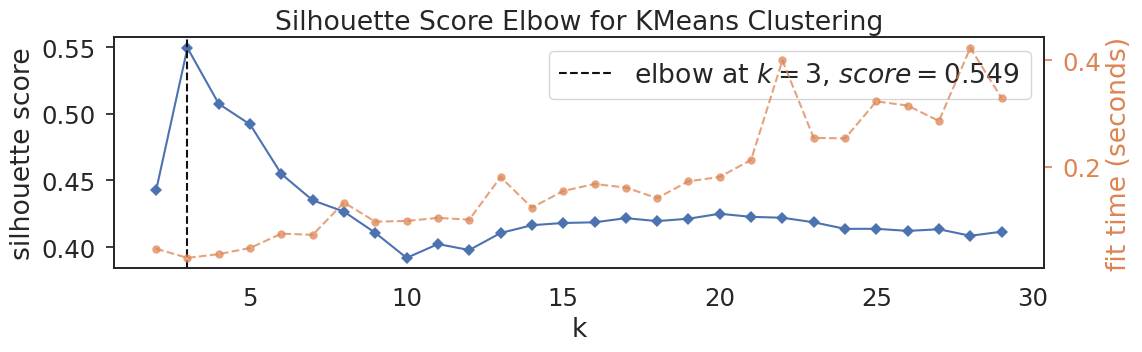

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [75]:
# Silhouette Score for K means
model = KMeans(n_init=10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(df_A)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<p style='text-align: justify;'> Compute the Davies-Bouldin score e is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better scor The minimum score is zero, with lower values indicating better clustering.e.</p>

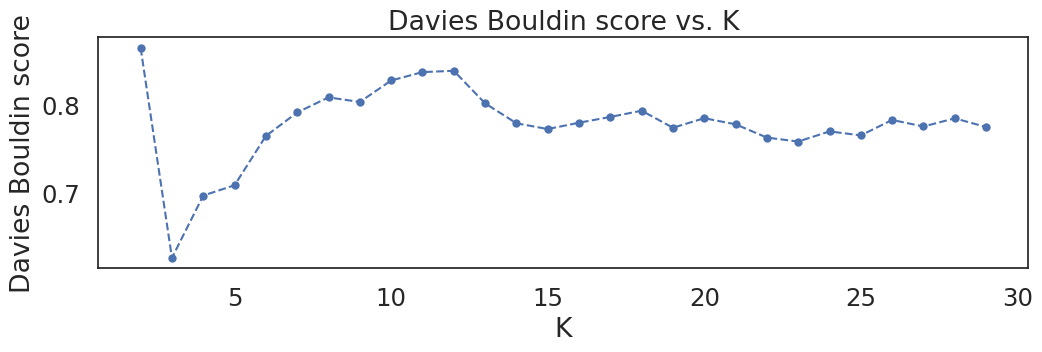

In [76]:
def get_kmeans_score(data, center):   
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, n_init=10)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(df_A) 
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(df_A, model)
    return score
    
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(df_A, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

<p style='text-align: justify;'> 
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to cluster..</p>

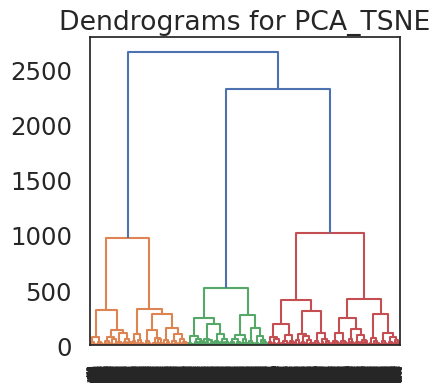

In [77]:
# Dendogram for Heirarchical Clustering
pyplot.figure(figsize=(4, 4))  
pyplot.title("Dendrograms for PCA_TSNE")  
dend = shc.dendrogram(shc.linkage(df_A, method='ward'))

<p style='text-align: justify;'> CalinskiHarabaszEvaluation is an object consisting of sample data (X), clustering data (OptimalY), and Calinski-Harabasz criterion values (CriterionValues) used to evaluate the optimal number of clusters (OptimalK). The Calinski-Harabasz criterion is sometimes called the variance ratio criterion (VRC). Well-defined clusters have a large between-cluster variance and a small within-cluster variance.</p>

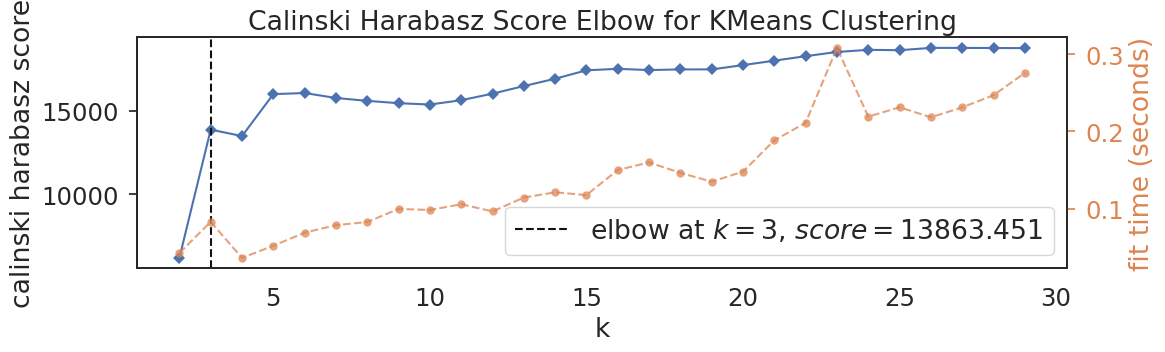

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [78]:
model = KMeans(n_init = 10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, n_init = 10)
visualizer.fit(df_A)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

<p style='text-align: justify;'> Based on the previous evaluation, the cluster number in the k means should be n = 3 or 4. The differences arise from the discrepancy between the diferent scores</p>

In [79]:
kmeans = KMeans(4, n_init=10)
kmeans.fit(df_corr2)
labels = kmeans.labels_

In [80]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_corr2.columns])
cluster_centers.head(1)     

% Asian   % Black    % Hisp   % White %Elearners     % Pov       ENI
0  0.325152  0.120463  0.324951  0.197958   0.117399  0.673695  0.566572

In [81]:
# Let's scale the data first
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_corr2)

In [82]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_corr2.columns])
cluster_centers.head(1)

% Asian   % Black    % Hisp   % White %Elearners     % Pov       ENI
0  0.15895  0.370275  0.483968  0.162911   0.112983  0.880271  0.792524

In [83]:
labels.shape # Labels associated to each data point

(8051,)

In [84]:
labels.max()

3

In [85]:
labels.min()

0

In [86]:
y_kmeans = kmeans.fit_predict(df_corr2)
y_kmeans

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [87]:
# concatenate the clusters labels to our original dataframe
df_corr3 = pd.concat([df_corr2, pd.DataFrame({'cluster':labels})], axis = 1)
df_corr3.head(1)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI  \
0  0.043716  0.355191  0.584699  0.010929    0.092896  0.923497  0.929921   

   cluster  
0        1

In [88]:
# Define a simple 
query = """
    SELECT 
        cluster
    FROM 
        df_corr3
"""
# Run the query
df_B = sqldf(query, locals())

In [89]:
df_B = pd.DataFrame(df_B)
df_B.head(1)

cluster
0        1

In [90]:
df_final = pd.concat([df_A, df_B], axis=1)
df_final.head(1)

Dim 1     Dim 2  cluster
0 -24.395292 -9.512433        1

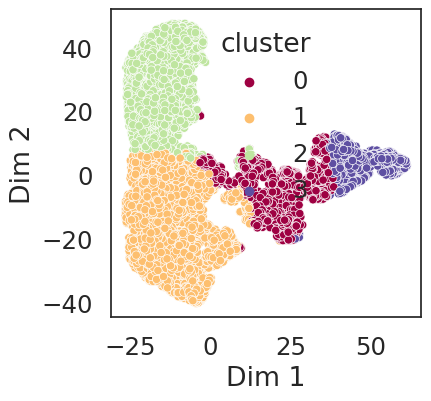

In [103]:
plt.figure(figsize=(4,4))
ax = sns.scatterplot(x="Dim 1", y="Dim 2", hue = "cluster", data = df_final, palette = 'Spectral')
plt.show()

**There is something with the KMeans algorithm that makes a wrong division in the clusters.**

#### ii. Spectral

<p style='text-align: justify;'> Spectral Clustering is a variant of the clustering algorithm that uses the connectivity between the data points to form the clustering. It uses eigenvalues and eigenvectors of the data matrix to forecast the data into lower dimensions space to cluster the data points.</p>

In [98]:
selected_cols = ['Dim 1', 'Dim 2']
data = df_A[selected_cols]

In [99]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(data)

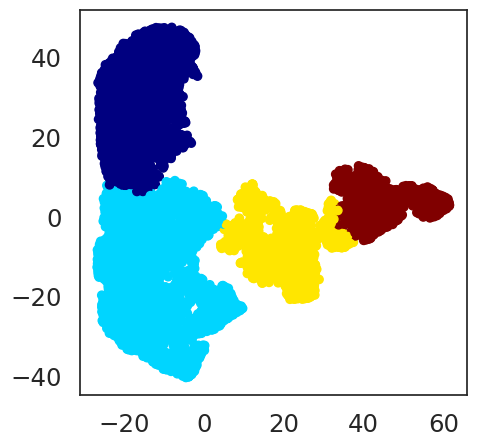

In [100]:
# Building the label to colour mapping
colours = {}
colours['Dim 1'] = 'b'
colours['Dim 2'] = 'y'
plt.figure(figsize = (5,5)) 
# Visualizing the clustering 
plt.scatter(data['Dim 1'], data['Dim 2'],  
           c = SpectralClustering(n_clusters = 4, affinity ='rbf') .fit_predict(data), cmap =plt.cm.jet) 
plt.show() 

**Despite we obtained a better clustering, it still does not make sense the dibision in the right side**

#### iii. DBSCAN

<p style='text-align: justify;'> DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers). The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.</p>


In [104]:
# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs.fit(df_A)

DBSCAN()

In [105]:
labels = dbs.labels_
df_A['labels'] = labels

In [106]:
nn = NearestNeighbors(n_neighbors=4) # minimum points -1
nbrs = nn.fit(df_A)
distances, indices = nbrs.kneighbors(df_A)

In [107]:
distances = np.sort(distances, axis=0)
distances = distances[:,1] # Choosing only the smallest distances
type(df_A)
df_A.head(1)

Dim 1     Dim 2  labels
0 -24.395292 -9.512433       0

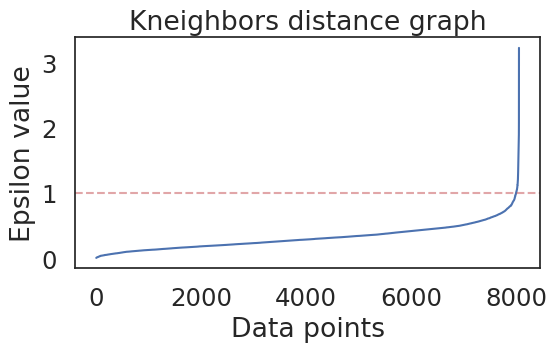

In [108]:
plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=1, color='r', linestyle='--', alpha=0.5) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();

In [109]:
# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps=1, min_samples=5)
dbs.fit(df_A)

DBSCAN(eps=1)

In [110]:
labels = dbs.labels_
df_A['labels'] = labels

In [111]:
labels_list = list(df_A['labels'])
n_noise = labels_list.count(-1)
print("Number of noise points:", n_noise)

Number of noise points: 379


In [112]:
total_labels = np.unique(labels)

n_labels = 0
for n in total_labels:
    if n != -1:
        n_labels += 1
print("Number of clusters:", n_labels)

Number of clusters: 413


**This approach is let out the cluster many points, and give a big number of clusters. If you want to try to modifi the parameters feel free, but the results doest not correspond with the graph representation**

## 2.3 Deep learning

<p style='text-align: justify;'> DBSCAN stands for density-based spatial clustering of applications with noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers). The main idea behind DBSCAN is that a point belongs to a cluster if it is close to many points from that cluster.

In this case the approach will be used to train the model in order to reduce the noise and obtain better results in the clustering</p>

### 2.3.1 Model and training

In [113]:
encoding_dim = 3
# We use 7 as a parameter since we have 7 features and we will apply a enecoder
input_df = Input(shape=(7,))

# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution 
x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(7, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(7, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [114]:
autoencoder.fit(df_corr2, df_corr2, batch_size = 128, epochs = 30,  verbose = 1)

Epoch 1/30
63/63 [==============================] - 3s 25ms/step - loss: 0.0409
Epoch 2/30
63/63 [==============================] - 2s 24ms/step - loss: 0.0148
Epoch 3/30
63/63 [==============================] - 1s 24ms/step - loss: 0.0056
Epoch 4/30
63/63 [==============================] - 1s 23ms/step - loss: 0.0044
Epoch 5/30
63/63 [==============================] - 1s 23ms/step - loss: 0.0037
Epoch 6/30
63/63 [==============================] - 2s 25ms/step - loss: 0.0034
Epoch 7/30
63/63 [==============================] - 2s 25ms/step - loss: 0.0030
Epoch 8/30
63/63 [==============================] - 1s 22ms/step - loss: 0.0028
Epoch 9/30
63/63 [==============================] - 1s 22ms/step - loss: 0.0027
Epoch 10/30
63/63 [==============================] - 1s 23ms/step - loss: 0.0026
Epoch 11/30
63/63 [==============================] - 2s 25ms/step - loss: 0.0023
Epoch 12/30
63/63 [==============================] - 2s 25ms/step - loss: 0.0023
Epoch 13/30
63/63 [==================

In [115]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 3)                 24        
                                                                 
 dense_1 (Dense)             (None, 500)               2000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 7)                 14007     
                                                                 
 dense_5 (Dense)             (None, 2000)              16000 

In [116]:
autoencoder.save_weights('autoencoder.h5')

In [117]:
pred = encoder.predict(df_corr2)

252/252 [==============================] - 1s 3ms/step


In [118]:
pred.shape

(8051, 7)

**We got the same shape of the original data**

In [119]:
pred = pd.DataFrame(pred)
pred.head(1)

0    1    2    3    4         5         6
0  0.518289  0.0  0.0  0.0  0.0  0.772157  0.444602

### 2.3.2 Dimension Reduction

<p style='text-align: justify;'> We will use the same path from the original data PCA->t-SNE and then clustering algorithmsg</p>

Text(0, 0.5, 'Cumulative Explained Variance')

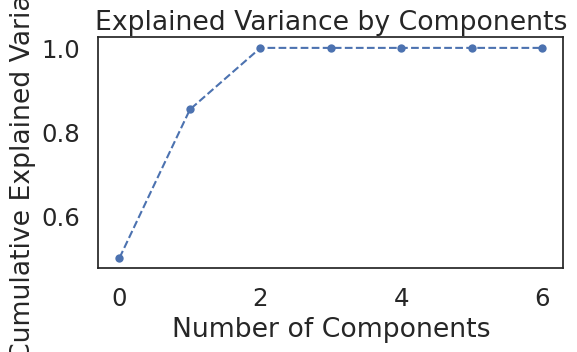

In [120]:
# PCA
pca = PCA()
pca.fit(pred)
pca.explained_variance_ratio_
plt.figure(figsize = (6,3))
plt.plot(range(0,7),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

**We can observe that the cumulative explained variance reach a bigger value with 3 clusters**

In [121]:
# Reducing the dimensions with PCA and the aplying TSNE 
pca = PCA()
pca.fit(df_corr2)
PCA_model = PCA(n_components=3) # defines previously from the graph analysis
deep_PCA_transformed_data = PCA_model.fit_transform(pred)

Text(0, 0.5, 'KL divergence')

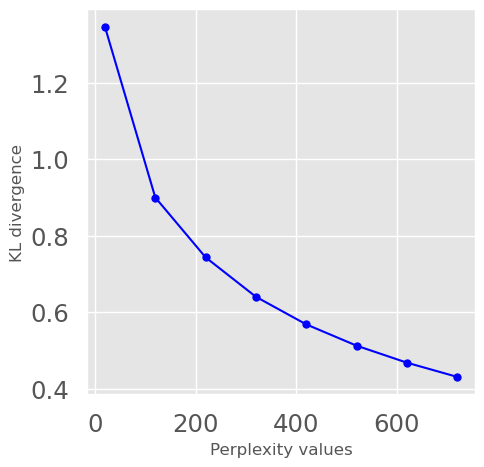

In [863]:
#This steps are very time cost demanding, I suggest to try it first as I present here to got the perplexity value
perplexity_vals = np.arange(20, 820, 100)
KL_divergences = []

for i in perplexity_vals:
  TSNE_model = TSNE(n_components=2, perplexity=i, n_iter=500).fit(deep_PCA_transformed_data)
  KL_divergences.append(TSNE_model.kl_divergence_)

plt.style.use("ggplot") 
plt.figure(figsize=[5, 5])
plt.plot(perplexity_vals, KL_divergences, marker='o', color='blue')
plt.xlabel("Perplexity values")
plt.ylabel("KL divergence")

In [866]:
perplexity_vals = np.arange(250, 330, 5)
KL_divergences = []

for i in perplexity_vals:
  TSNE_model = TSNE(n_components=2, perplexity=i, n_iter=500).fit(deep_PCA_transformed_data)
  KL_divergences.append(TSNE_model.kl_divergence_)

plt.style.use("ggplot") 
plt.figure(figsize=[5, 5])
plt.plot(perplexity_vals, KL_divergences, marker='o', color='blue')
plt.xlabel("Perplexity values")
plt.ylabel("KL divergence")

Text(0, 0.5, 'KL divergence')

In [122]:
#After a long time I deduced this values of perplexity and iteration, but feel free to modify to see how the plot changes
TSNE_model = TSNE(n_components=2, perplexity=400, learning_rate='auto', n_iter=10000, random_state=42)
deep_PCA_TSNE_transformed_data = TSNE_model.fit_transform(deep_PCA_transformed_data)

In [123]:
deep_PCA_TSNE_transformed_data =pd.DataFrame(deep_PCA_TSNE_transformed_data)
deep_PCA_TSNE_transformed_data.rename(columns = {0:'Dim 1', 1:'Dim 2'}, inplace = True)
deep_PCA_TSNE_transformed_data.head(1)

Dim 1    Dim 2
0 -16.987234  5.89438

In [124]:
plt.figure(figsize=(5,5))
ax = sns.scatterplot(x="Dim 1", y="Dim 2", data = deep_PCA_TSNE_transformed_data)
plt.show()

**Now we can observe a much more clear pattern in the clusters**

### 2.3.3 Clustering

#### i. KMeans

In [125]:
scores_deep = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i, n_init=10)
  kmeans.fit(deep_PCA_TSNE_transformed_data)
  scores_deep.append(kmeans.inertia_) 

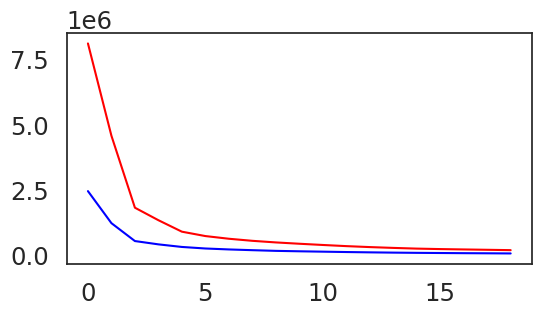

In [126]:
plt.figure(figsize=(6,3))
plt.plot(scores_1, color = 'red')
plt.plot(scores_deep, color = 'blue')
plt.show()

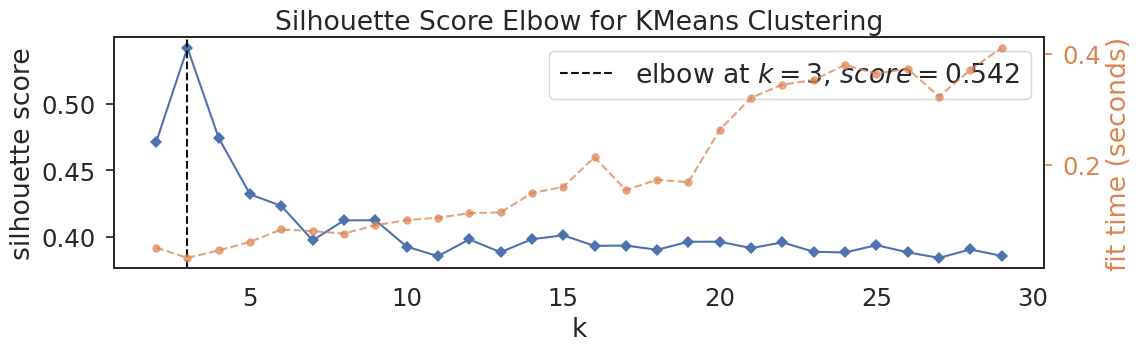

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [127]:
# Silhouette Score for K means
model = KMeans(n_init=10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(deep_PCA_TSNE_transformed_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

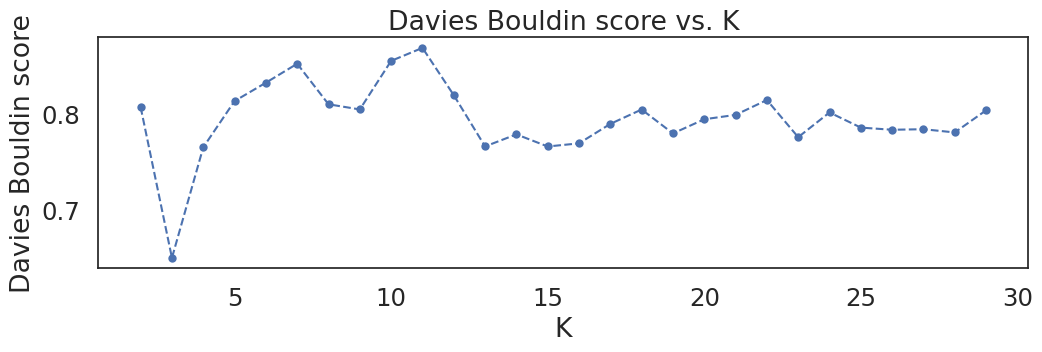

In [128]:
def get_kmeans_score(data, center):   
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, n_init=10)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(deep_PCA_TSNE_transformed_data) 
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(deep_PCA_TSNE_transformed_data, model)
    return score
    
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(PCA_TSNE_transformed_data, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

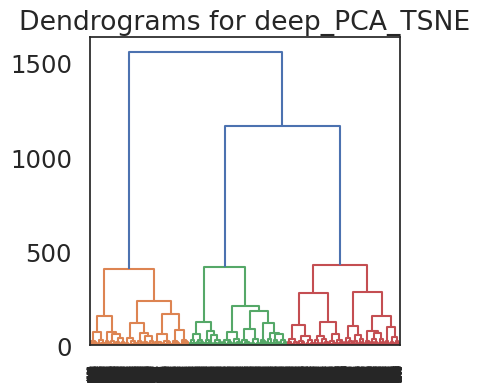

In [129]:
# Dendogram for Heirarchical Clustering
pyplot.figure(figsize=(4, 4))  
pyplot.title("Dendrograms for deep_PCA_TSNE")  
dend = shc.dendrogram(shc.linkage(deep_PCA_TSNE_transformed_data, method='ward'))

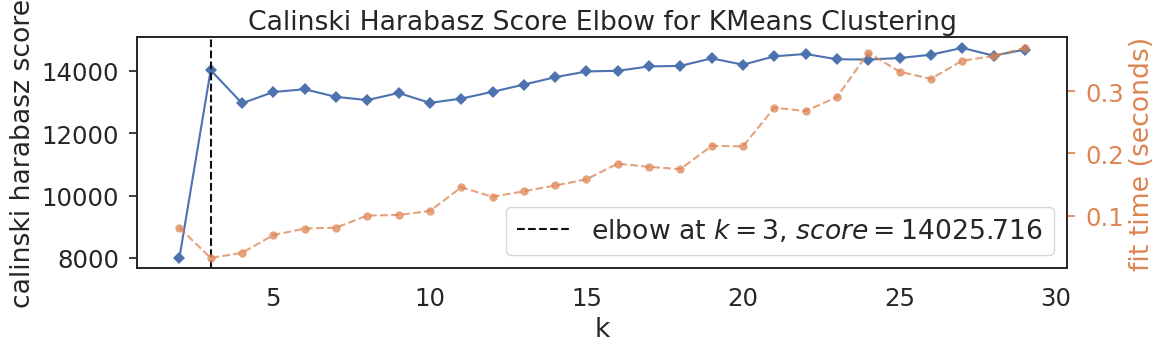

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [130]:
model = KMeans(n_init = 10)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True, n_init = 10)
visualizer.fit(deep_PCA_TSNE_transformed_data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Now all the scores strongly suggest the cluster number = 3**

In [151]:
kmeans = KMeans(3, n_init= 10)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(deep_PCA_TSNE_transformed_data)

In [152]:
df_cluster_dr = pd.concat([df_corr2, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head(1)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI  \
0  0.043716  0.355191  0.584699  0.010929    0.092896  0.923497  0.929921   

   cluster  
0        1

In [133]:
deep_PCA_TSNE_transformed_data =pd.DataFrame(deep_PCA_TSNE_transformed_data)

In [134]:
PCA_TSNE_deep = pd.concat([deep_PCA_TSNE_transformed_data,pd.DataFrame({'cluster':labels})], axis = 1)
PCA_TSNE_deep.rename(columns = {0:'Dim 1', 1:'Dim 2'}, inplace = True)
PCA_TSNE_deep.head(1)

Dim 1    Dim 2  cluster
0 -16.987234  5.89438        1

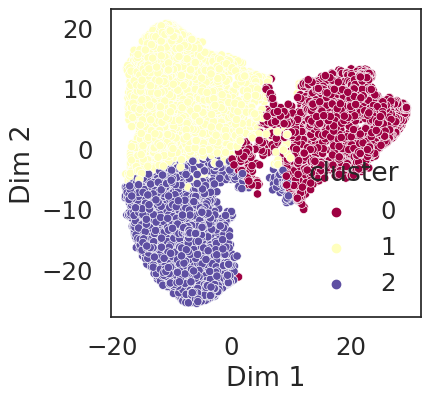

In [135]:
plt.figure(figsize=(4,4))
ax = sns.scatterplot(x="Dim 1", y="Dim 2", hue = "cluster", data = PCA_TSNE_deep, palette ='Spectral')
plt.show()

**Now we obtained a much better division, but still the clustering algorithm makes some cluster division that does not fit with what we can see at naked eye**

#### ii. Spectral clustering over deep

In [136]:
selected_cols = ['Dim 1', 'Dim 2']
data = deep_PCA_TSNE_transformed_data[selected_cols]

In [137]:
# Building the clustering model
spectral_model_rbf = SpectralClustering(n_clusters = 3, affinity ='rbf')
 
# Training the model and Storing the predicted cluster labels
labels_rbf = spectral_model_rbf.fit_predict(data)

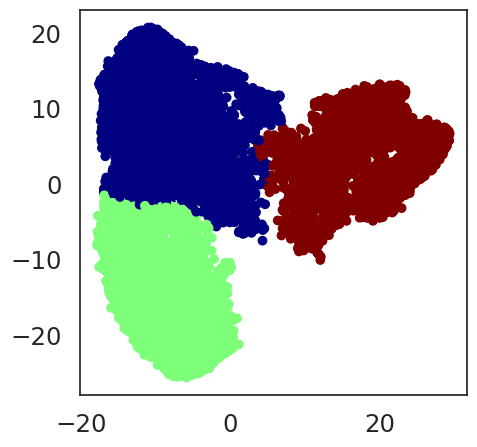

In [138]:
# Building the label to colour mapping
colours = {}
colours['Dim 1'] = 'b'
colours['Dim 2'] = 'y'
plt.figure(figsize = (5,5)) 
# Visualizing the clustering 
plt.scatter(data['Dim 1'], data['Dim 2'],  
           c = SpectralClustering(n_clusters = 3, affinity ='rbf') .fit_predict(data), cmap =plt.cm.jet) 
plt.show() 

**This clustering over the deep learning results are in agreement with what we can observe in the plot**

#### iii. DBSCAN over deep

In [139]:
deep_PCA_TSNE_transformed_data.head(1)

Dim 1    Dim 2
0 -16.987234  5.89438

In [140]:
# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs.fit(PCA_TSNE_deep)

DBSCAN()

In [141]:
labels = dbs.labels_
deep_PCA_TSNE_transformed_data['labels'] = labels

In [142]:
nn = NearestNeighbors(n_neighbors=3) # minimum points -1
nbrs = nn.fit(deep_PCA_TSNE_transformed_data)
distances, indices = nbrs.kneighbors(deep_PCA_TSNE_transformed_data)

In [143]:
distances = np.sort(distances, axis=0)
distances = distances[:,1] # Choosing only the smallest distances
type(deep_PCA_TSNE_transformed_data)
deep_PCA_TSNE_transformed_data.head(1)

Dim 1    Dim 2  labels
0 -16.987234  5.89438       0

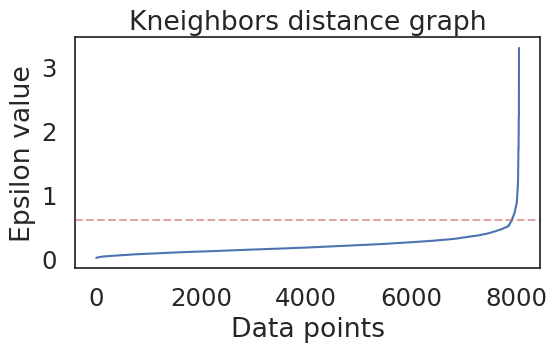

In [144]:
plt.figure(figsize=(6,3))
plt.plot(distances)
plt.axhline(y=0.6, color='r', linestyle='--', alpha=0.5) # elbow line
plt.title('Kneighbors distance graph')
plt.xlabel('Data points')
plt.ylabel('Epsilon value')
plt.show();

In [145]:
# min_samples == minimum points ≥ dataset_dimensions + 1
dbs = DBSCAN(eps= 0.6, min_samples=3)
dbs.fit(PCA_TSNE_deep)

DBSCAN(eps=0.6, min_samples=3)

In [146]:
labels = dbs.labels_
deep_PCA_TSNE_transformed_data['labels'] = labels

In [147]:
labels_list = list(deep_PCA_TSNE_transformed_data['labels'])
n_noise = labels_list.count(-1)
print("Number of noise points:", n_noise)

Number of noise points: 154


In [148]:
total_labels = np.unique(labels)

n_labels = 0
for n in total_labels:
    if n != -1:
        n_labels += 1
print("Number of clusters:", n_labels)

Number of clusters: 42


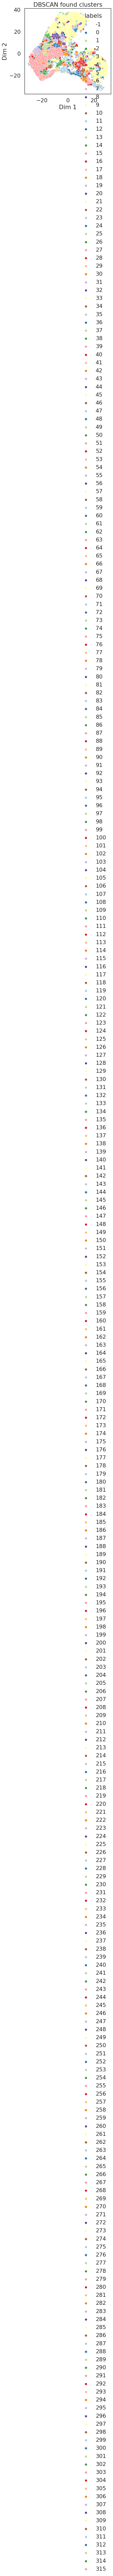

In [853]:
#plt.figure(figsize = (5,5))
#sns.scatterplot(data=deep_PCA_TSNE_transformed_datap, x= deep_PCA_TSNE_transformed_data['Dim 1'], y= deep_PCA_TSNE_transformed_data['Dim 2'], hue='labels', palette='Paired').set_title('DBSCAN found clusters');

**In a similar way with the data previous the deep learning, the results of the DBSCAN clustering gives to many clusters. We discard this options**

# 3. Results

<p style='text-align: justify;'> The clustering results could be associated with the original features of corr_2.</p>

In [157]:
df_cluster_dr.drop('cluster',inplace=True, axis=1)
df_cluster_dr.head(1)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI
0  0.043716  0.355191  0.584699  0.010929    0.092896  0.923497  0.929921

<p style='text-align: justify;'> We can obtain the profile of each cluster</p>

In [160]:
PCA_TSNE_deep = pd.concat([df_cluster_dr,pd.DataFrame({'cluster':labels})], axis = 1)
PCA_TSNE_deep.rename(columns = {0:'Dim 1', 1:'Dim 2'}, inplace = True)
PCA_TSNE_deep = pd.DataFrame(PCA_TSNE_deep)
PCA_TSNE_deep.head(1)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI  \
0  0.043716  0.355191  0.584699  0.010929    0.092896  0.923497  0.929921   

   cluster  
0        1

<p style='text-align: justify;'> The clustering results could be associated with the original features of corr_2.</p>

In [167]:
# Make the queries to get the cluster characteristics
query1 = '''
SELECT 
    "% Asian", "% Black","% Hisp", "% White", "%Elearners", "% Pov", "ENI", "cluster"   
FROM 
    PCA_TSNE_deep
WHERE
    "cluster"=0'''
df_cluster_0 = sqldf(query1, locals())
df_cluster_0 = pd.DataFrame(df_cluster_0)
round(df_cluster_0.describe(),3)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI  \
count  2592.000  2592.000  2592.000  2592.000    2592.000  2592.000  2592.000   
mean      0.255     0.108     0.276     0.324       0.089     0.544     0.462   
std       0.196     0.109     0.148     0.220       0.081     0.214     0.187   
min       0.000     0.000     0.015     0.000       0.000     0.029     0.030   
25%       0.089     0.026     0.154     0.142       0.023     0.394     0.318   
50%       0.204     0.068     0.246     0.296       0.062     0.572     0.476   
75%       0.367     0.160     0.394     0.471       0.138     0.721     0.607   
max       0.947     0.611     0.794     0.933       0.328     0.968     0.910   

       cluster  
count   2592.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0

<p style='text-align: justify;'> The cluster 0 is about 1/3 of white students, we canno classify it as a "white school", the percentajes of asian and Asian and Hispanic students are quite similar about 25%. But the black students are only 10%. This group is more diverse in racial composition but with a slight low level of black students. Also they present a medium economic needs</p>

In [165]:
# Make the queries to get the cluster characteristics
query1 = '''
SELECT 
    "% Asian", "% Black","% Hisp", "% White", "%Elearners", "% Pov", "ENI", "cluster"   
FROM 
    PCA_TSNE_deep
WHERE
    "cluster"=1'''
df_cluster_1 = sqldf(query1, locals())
df_cluster_1 = pd.DataFrame(df_cluster_1)
round(df_cluster_1.describe(),3)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI  \
count  2976.000  2976.000  2976.000  2976.000    2976.000  2976.000  2976.000   
mean      0.041     0.239     0.670     0.036       0.152     0.866     0.824   
std       0.056     0.120     0.123     0.046       0.079     0.084     0.089   
min       0.000     0.000     0.166     0.000       0.000     0.498     0.337   
25%       0.008     0.155     0.590     0.011       0.090     0.812     0.772   
50%       0.019     0.249     0.665     0.020       0.142     0.878     0.835   
75%       0.050     0.319     0.748     0.040       0.208     0.933     0.891   
max       0.502     0.573     0.995     0.419       0.330     1.000     0.982   

       cluster  
count   2976.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0

<p style='text-align: justify;'> The cluster 1 has a high % of Hispanic students 67,0 and a high economic needs.</p>

In [166]:
# Make the queries to get the cluster characteristics
query1 = '''
SELECT 
    "% Asian", "% Black","% Hisp", "% White", "%Elearners", "% Pov", "ENI", "cluster"   
FROM 
    PCA_TSNE_deep
WHERE
    "cluster"=2'''
df_cluster_2 = sqldf(query1, locals())
df_cluster_2 = pd.DataFrame(df_cluster_2)
round(df_cluster_2.describe(),3)

% Asian   % Black    % Hisp   % White  %Elearners     % Pov       ENI  \
count  2483.000  2483.000  2483.000  2483.000    2483.000  2483.000  2483.000   
mean      0.035     0.694     0.222     0.026       0.061     0.811     0.722   
std       0.046     0.150     0.125     0.030       0.048     0.099     0.123   
min       0.000     0.279     0.006     0.000       0.000     0.314     0.269   
25%       0.009     0.588     0.116     0.009       0.026     0.750     0.647   
50%       0.019     0.707     0.203     0.016       0.049     0.818     0.732   
75%       0.041     0.817     0.314     0.030       0.082     0.887     0.813   
max       0.366     0.987     0.597     0.237       0.303     0.996     0.981   

       cluster  
count   2483.0  
mean       2.0  
std        0.0  
min        2.0  
25%        2.0  
50%        2.0  
75%        2.0  
max        2.0

<p style='text-align: justify;'> The cluster 2 has 69,4 % of black students and a high economic needs</p>

# 4. Discusion

<p style='text-align: justify;'> The public-school profile of the NYC students indicates a natural clustering scenario mainly based on the race. The deep learning helped us to reduce the noise in the analysis and stablish three clusters. This is in agreement with the historical data of NYC. Despite the short story as a big economic center, the city has received different waves of migrants. It´s quite normal that the ones who arrives tried to find contact networks of jobs in the new land based on the relativeness, for this reason the self-forming neighborhoods are present. The reason of NYC as a constant center of foreigners it out of topic of this research.

The cluster 1 indicates schools with high percentage of Hispanic, English language learners with high economic needs. This corresponds with a recent migration of Mexicans show below. This profile of new arrival citizens with low incomes could be related with the Irish migration about two centuries ago or the Italians at the beginning the last century. This may indicate that more than a racial segregation the ethnic profile in some self-formed neighbors could be one characteristic of the migration as a phenomena per se.  
 </p>


 ![](https://thumbs.6sqft.com/wp-content/uploads/2015/04/20235901/Immigration-infographic.jpg?w=965&format=webp)

<p style='text-align: justify;'> In the same line of the last part of the analysis, we can argue that "% White" it´s quite ambiguous since a mixed racial person Irish and Polish ancestry classifies just as white and not as Multiracial, despite the differences in both cultures. We can argue the same of the Black Hispanic called “mulato” in Latin-American, or the cultural differences of a 4th generation Black resident and a migrant from Africa. For this reason, we should complement the analysis with a geographical distribution of the racial groups.</p>

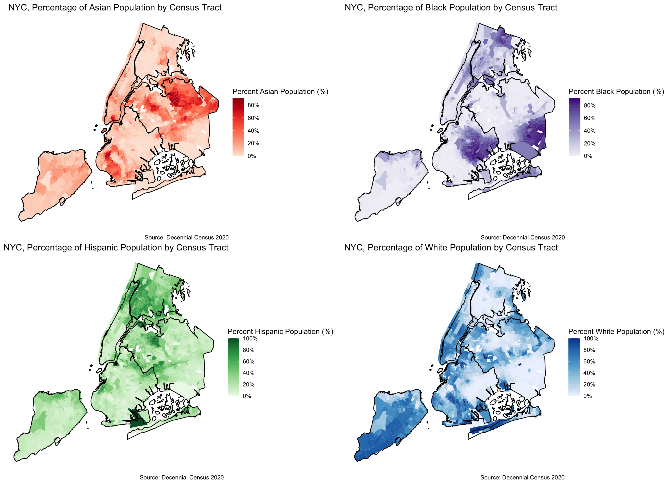


<p style='text-align: justify;'> The geographic distribution data obtained from Mae Francke job clearly shows:
    1. mutual exclusion of White, Hispanic and Black population. 
    2. multiple ethnic centers of the same "race classification
    
Based on the recent history of USA we can relate the black segregation since laws like Interracial marriage has been fully legal in all U.S. states since the 1967 Supreme Court 
decision that deemed anti-miscegenation state laws unconstitutional (via the 14th Amendment adopted in 1868) with many states choosing to legalize interracial marriage at much earlier dates.
 

This is quite different from the "Hispanic" culture since it was common since the first law in the Modern Spain in 1514. In the same way we can argue the resistance of the Dominican migrants to self-identify as Black as an issue in the racial profile, or the classification problem of migrants from Uruguay and Argentina to be classified as "White". The term by itself has arisen many attempts to solve this like "white Hispanic", "non-white Hispanic", among others 
.</p>

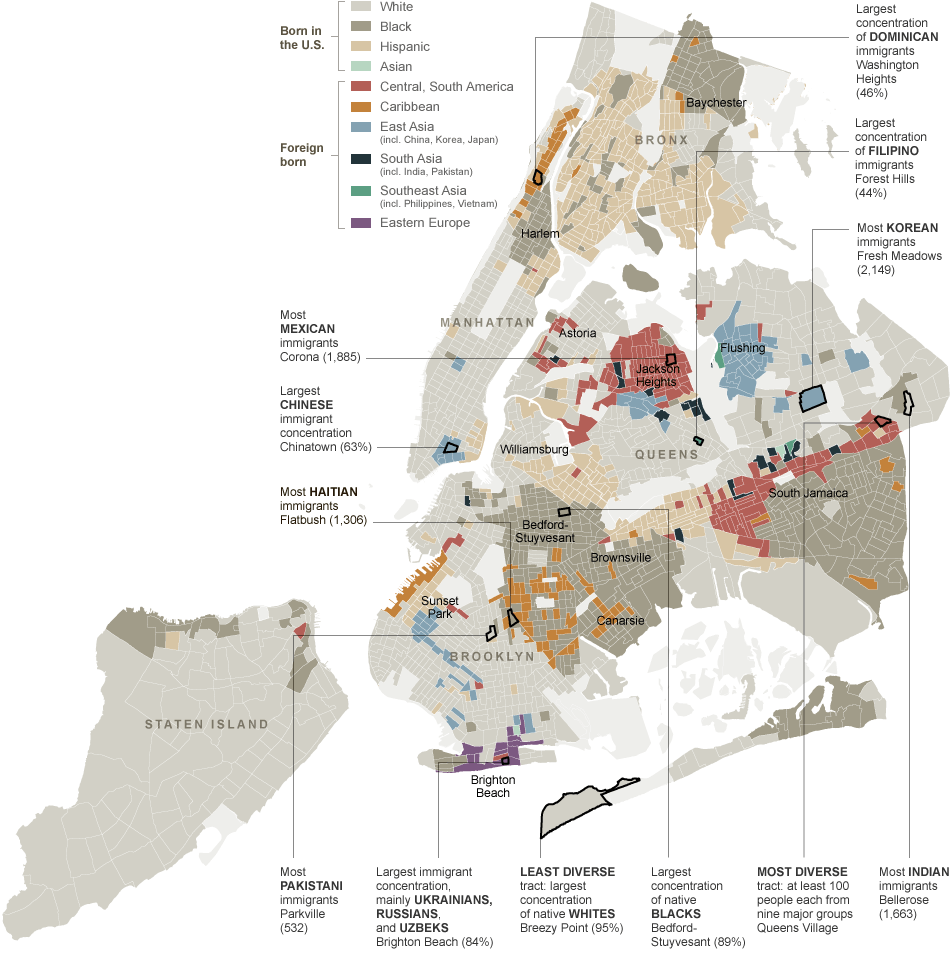

<p style='text-align: justify;'> Despite the problems, we should see the natural distribution of the citizen in the map of Fig 2. as a cue to understand how is naturally understood. According to this, the racial profile 1. reflects the migratory phenomena 2. it may hide more clusters due the ambiguity of the racial classification. 

I would suggest a better enrollment profile considering the culture (ancestry of the students or parents), how many generations has been the family in USA or NYC, income level and other items such as religious feature and some classification of the conservative/liberal score of the family. This proposed approach would allow to distinguish between two groups of Asian such Indian vs Filipino. Or religious groups like orthodox Jews families from secular ones. A better profile in the student gives a better picture of the scenario to implement educational public policies and evaluate how effective would be the implementation of strategies to migrant integration to the USA society, stop the drug in the youngsters or the bulling. 
</p>


# 5. Conclusion

<p style='text-align: justify;'> ""What is the composition in the NYC public schools? This research approach shows that there is a strong weight on the racial level. And we can identify at least three clusters: i) multi racial with medium economic needs ii) schools with high percentage of black students and high economic needs iii) schools with high percentage of Hispanic students and high economic needs. This clusters reflect the geographic distribution of the ethnics in NYC caused by the migration. Nevertheless, I strongly suggest a profile including cultural features to correlate better with the population neighborhoods.
.</p>

# 6. References

School-level student demographic and enrollment data from 2014-15 through 2018-19
Data Provided by NYC Department of Education
https://data.cityofnewyork.us/Education/2018-2019-School-Demographic-Snapshot/45j8-f6umm

https://www.6sqft.com/infographic-shows-387-years-of-immigration-patterns-in-nyc/

https://www.census.gov/topics/population/race/about.html#:~:text=Black%20or%20African%20American%20%E2%80%93%20A,tribal%20affiliation%20or%20community%20attachment.

https://archive.nytimes.com/www.nytimes.com/interactive/2011/01/23/nyregion/20110123-nyc-ethnic-neighborhoods-map.html

https://rpubs.com/maefrancke/raceinnyc